# <center> An Overview of Supervised Learning </center>
#### <center> Notes by: Clay Curry </center> 
---

## Introduction
The central goal of **supervised learning** is discovering patterns and central tendencies in data by creating [classification and regression models](https://www.statlect.com/fundamentals-of-statistics/conditional-models#hid4). This paper exists to give subject of **supervised regression** the precise introduction it deserves. In supervised learning problems, the following seven motivating questions commonly show up that we might seek to address:

1. Can we associate some ***relationship*** between a collection of predictive measures and a response.
    - Our first goal should be to determine whether the data provide evidence of an association between a collection of predictive measures and a desired response. If the evidence is weak, then one might argue that the predictive measures provide no indication for the desired response.
2. How ***strong*** is the relationship between a collection of predictive measures and a response.
    - Assuming there is a relationship, we would like to know the strength of the relationship. In other words, given a certain knowledge of predictive measures, can we predict the response with high level of accuracy? In this case, this would be a strong relationship. Or is a prediction of the response on the basis of the predictive measures only slightly better than a random guess? This would be a weak relationship.
3. Which individual predictive medium ***contributes the most*** to the response?
    - Do all the individual mediums contribute to the response or do just one or two of the individual mediums contribute? To answer this question, we must find a way to separate out the individual effects of each medium when they exist in some amount for all observations.
4. How accurately can we estimate the ***effect of each*** medium on the response?
    - For example, for every dollar spent on advertising in a partiular medium, by what amount will sales increase? How accurately can we predict the amount of increase?
5. How ***accurately*** can we predict future responses on the bases of the predictive measures?
    - For any given level of predictive measure, what is our prediction for the response and what is the accuracy of the response?
6. Is the relationship ***linear***?
    - For example, if there is approximately a straight-line relationship between the predictorsin the varius mediums and the response, then linear regression is an appropriate tool. If not, then it may still be possible to transform the predictor or response so that linear regression can be used.
7. Is there <i><b>synergy</b></i> among the predictive measures?
    - For example, perhaps spending \\$50,000 on television advertising and \\$50,000 on radio advertising results in more sales than allocating $100,000 to either television or radio individually. In marketing this is known as a ***synergy*** effect while in statistics it is called an interaction ***effect***.
    
To answer these questions, we assume the existence of some **functional relationship** $f : \mathbb{R}^n \to \mathbb{R}^m$ (often called the **signal**) between a set of regressors $X = \{\mathbf{X_1, X_2, \ldots, X_p}\} \subsetneq \mathbb{R}^n$ and its image $Y = \{\mathbf{Y_1, Y_2, \ldots, Y_p}\} \subsetneq \mathbb{R}^m$. **Supervised regression** refers to the set of tools used to answer the above questions and predict the hypothesized functional relationship for data belongs to **ordered** **continuous** **sets** (to juxtapose nominal (unordered, categorical) data).

## Strategy
Suppose we are interested in predicting the functional relationship between some some real-valued random vector $\mathbf{X_i} \in \mathbb{R}^n$ (commonly called **features**, **regressors**, **predictors**, **covariate**, **explanatory variables**, **manipulated variables**, **input vector**) and each cooresponding real-valued output $\mathbf{Y_i} \in \mathbb{R}^m$ (commonly called the **quantitative response**, **response**, **regressand**, **output vector**) on the basis of $N$ observations of $\mathbf{X_i} \in \{\mathbf{X_1, X_2, \ldots, X_p}\}$ known as the **training set**. 

$$
\begin{equation}
Y_i = f(X_i) + \epsilon_i
\label{eq:systemic} \tag{1}
\end{equation}
$$

In $\eqref{eq:systemic}$, the function is the <b><u>systematic information</u> that the known variable $X$ provides about the unknown variable $Y-$</b> $f$ encodes the relationship between the *known* variables of $X$ and the output $Y$. The error terms $\epsilon_i \sim N(0),$ is the **information about $Y$ that could not possibly be inferred in $f(X)$** due to the fact that no training set is likely to ever be *omniscient*.

In supervised regression, we seek to find a general method for calculating some $\hat f : \mathbb{R}^n \to \mathbb{R}^m$, commonly called a **hypothesis function**, on the basis of the training data such that

$$
\mathbb{E}[\hat f] = f
$$

In addition to calculating a hypothesis, supervised learning techniques should also provide a rigorous way to answer the motivating questions in supervised learning.

Note: the equation in $\eqref{eq:systemic}$ assumes that the error terms following some consistent probability distribution, but we do not know which distribution best describes the randomness inherent to the error terms. The [principle of maximum entropy](https://mtlsites.mit.edu/Courses/6.050/2003/notes/chapter10.pdf) states that the probability distribution which best represents the current state of knowledge about a system is the one with largest entropy; it is a miraculous fact that the Normal (or Gaussian) distribution has maximum entropy among all real-valued exponential distributions supported on (−∞,∞) with a specified variance. Therefore, we assume, without loss or gain in Shannon information, the random variable $\epsilon$ follows the same distribution as the Gaussian function.

### Example : Polynomial Fitting by Polynomial Regression

To motivate a number of key concepts, models, and evaluating the performance our model, we shall consider an artificial example where the **systematic information that $X \in \mathbb{R}$ provides about $Y \in \mathbb{R}$** is completely known.


In [322]:
# General (Signal) Polynomial Generator
import matplotlib.pyplot as plt
import numpy as np

def poly(degree, coeff):
    def p(x):
        action = 0
        for term in range(degree + 1):
            action += coeff[term] * x**(term)
        return action
    return p

Here the **systematic information that X provides for Y**, $f \in \mathbb{P}_3$, is given by

$$
f(x) = 2 - x + x^2 + x^3
$$

for all $x \in X$. Hence

$$
Y = f(X) + \epsilon
$$

where $\epsilon \sim \mathcal N(0, \sigma ^2)$ denotes random noise. One basic technique for approximating $f$ is by linear projection of the polynomial that fits all the data points.

To demonstrate this technique, first we generate some random data using the above $f$.

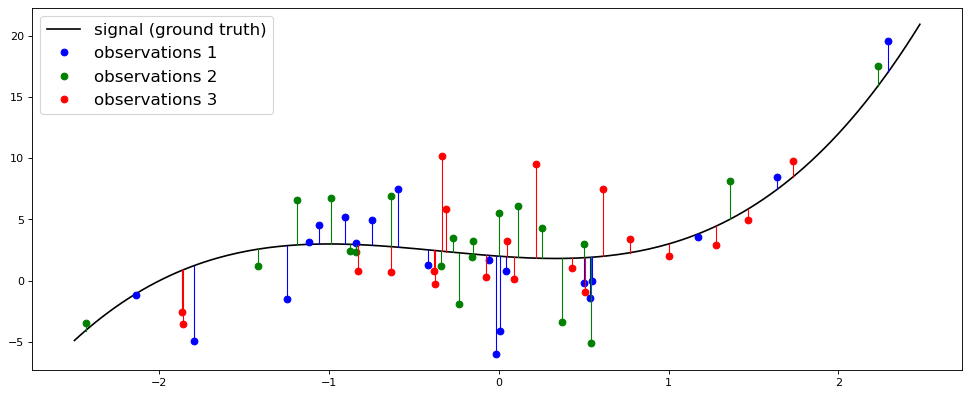

In [376]:
# Plot Signal (ground truth)
f = poly(3, (2, -1, 1, 1))
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(np.arange(-2.5, 2.5, 0.02), f(np.arange(-2.5, 2.5, 0.02)), 'k', label = "signal (ground truth)")

def plot(sample, noise, f, color, label):
    signal = f(sample)
    plt.plot(sample, signal+noise, f'{color}o', label=label)
    plt.plot([sample, sample], [signal, signal + noise], 
         color=color, linestyle='-', linewidth=1)

# Generating a representative sample
np.random.seed(2)
samples = np.random.normal(loc=0, scale=1, size=60)
# samples = np.arange(-2.0, 2.0, 0.02)
signal = f(samples)
noise = np.random.normal(0, 3, samples.size)

# Plotting sample data
n = samples.size
plot(sample=samples[0:int(n/3)], noise=noise[0:int(n/3)], f=f, color='b', label='observations 1')
plot(sample=samples[int(n/3):int(2*n/3)], noise=noise[int(n/3):int(2*n/3)], f=f, color='g', label = "observations 2")
plot(sample=samples[int(2*n/3):int(3*n/3)], noise=noise[int(2*n/3):int(3*n/3)], f=f, color='r', label = "observations 3")

plt.legend(prop={'size': 15})
plt.show()

Given **60 observations**, the simplest polynomial that exactly fits to all the data points is of **degree 59**. In fact, it is easily shown that this polynomial is unique and we can determine this unique polynomial using elimination.

Given the exact fitting, we see that our construction was influenced by more information than provided by the "ground truth" function. Because our model does not "pay attention" to the appropriate signal given by $f$, our model will perform poorly on unseen data. We know that a function that is correctly influenced by the true "signal" will be a degree 3 polynomial, so lets find 


To find the closest lower dimensional polynomial to the above polynomal, we require a rigorous way of making sense of "distance" which involves an elementary tool in linear algebra called the **inner product**. By performing the Gram-Schmidt orthonormalization process on the standard basis vectors of $\mathbb{P}_3(\mathbb{R})$ (polynomials) $\{1, x, x^2, x^3\}$ defined using the inner product.
$$
\langle p, q \rangle
$$
we can determine the approximating polynomial for the signal in $\mathbb{P}_5$ contained in the lower dimensional space $\mathbb{P}_3(\mathbb{R})$. 